# A simple bandit algorithm
$Initialize \space for \space a$

</p>
$\large a \leftarrow 1 \space to \space k: $
</p>
$\large Q(a) \leftarrow 0$
</p>
$\large N(a) \leftarrow 0$
</p>

$ Loop \space for \space ever:$
$$ \large
A = \begin{cases}
               argmax_a Q(a) \leftarrow with \space probability \space of \space (1 - \epsilon) \\
               a random action \leftarrow with \space probability \space of \space \epsilon \\
            \end{cases}
$$

$$\large R \leftarrow bandit(A) $$
$$\large N(A) \leftarrow N(A) + 1 $$
$$\large Q(A) \leftarrow R(A) + \frac {1}{N(A)} * \Big[ R - Q(A)\Big] $$

In [111]:
import numpy as np

In [112]:
K = 5
Q = np.zeros(K)
N = np.zeros(K)

In [124]:
epsilon = 0.01
action = 0.
rewards = np.random.normal(0,1,K)

In [125]:
for i in range(100000):
    if np.random.normal(size=1) > (1-epsilon):
        action = Q.argmax()
    else:
        action = np.random.randint(1,K)
    reward_val = rewards[action]
    rewardForTheCurrentAction = reward_val + np.random.random()
    N[action] += 1
    error = rewardForTheCurrentAction - Q[action]
    Q[action] += error / N[action]
Q

array([ 0.377429  , -0.55454944,  1.4791857 , -0.13781386, -0.67280698])

In [181]:
Q.max(),Q.min(),Q.argmax()

(1.4791856984592344, -0.6728069776472269, 2)

## 10-armed testbed

Text(0,0.5,'Reward distribution')

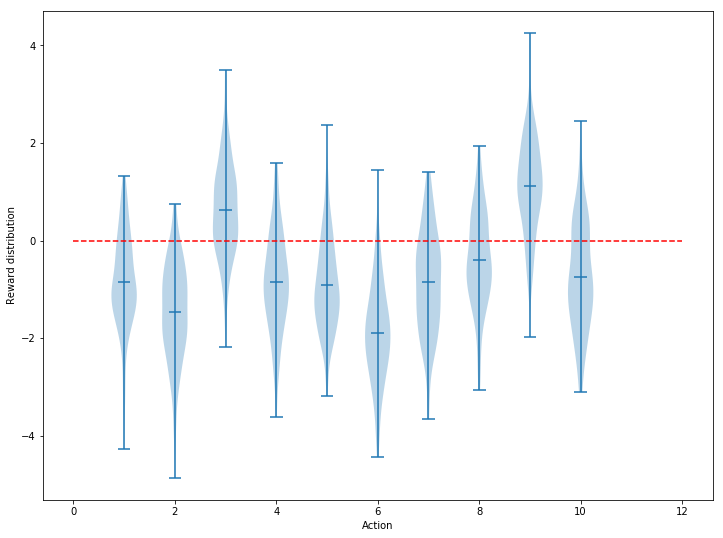

In [180]:
plt.figure(figsize=(12,9))
plt.violinplot(dataset=np.random.randn(200,10) + np.random.randn(10), showmeans=True)
plt.hlines(0,0,12,colors='r',linestyles='dashed')
plt.xlabel("Action")
plt.ylabel("Reward distribution")